In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
#Creating a sample
x = np.arange(start= 1, stop=50, step=2) #sample size
y =(x*0.5)**2.3 + 100 #Sample format- model however you want, I preferred an exponential curve
y = y + np.random.normal(scale=np.sqrt(np.max(y)), size=len(x))  # Add noise

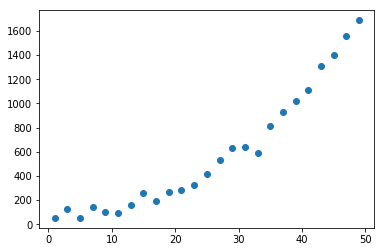

In [12]:
#Just play around with the sample unti you get the desired curve
plt.scatter(x, y);

In [13]:
#implementing the strucuture of the curve in a function. This step is needed for the curve fit below
def func(z, a, b, c):
    return (z*a) ** b + c

In [14]:
#Creating an equation to describe the sample after adding noise
popt, pcov = curve_fit(func, xdata=x, ydata=y)
y_fitted = (x*popt[0]) ** popt[1] + popt[2] #popt are the optmized parameters a,b and c

C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [15]:
#Just adding some flashy metrics
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
R= corr = pearsonr(x, y)
r2= r2_score(y, y_fitted)

In [16]:
#Texts to be placed in the graph- feel free to write your own comments :)
texts = {1:'Grrr não chegue perto',
         2:'Atenta.',
         3:'Querendo atenção/ comida \n    (ou ambos)',
         4:'É possível que eu tenha feito xixi na sua cama.\n vc não vai brigar comigo, vai?'}

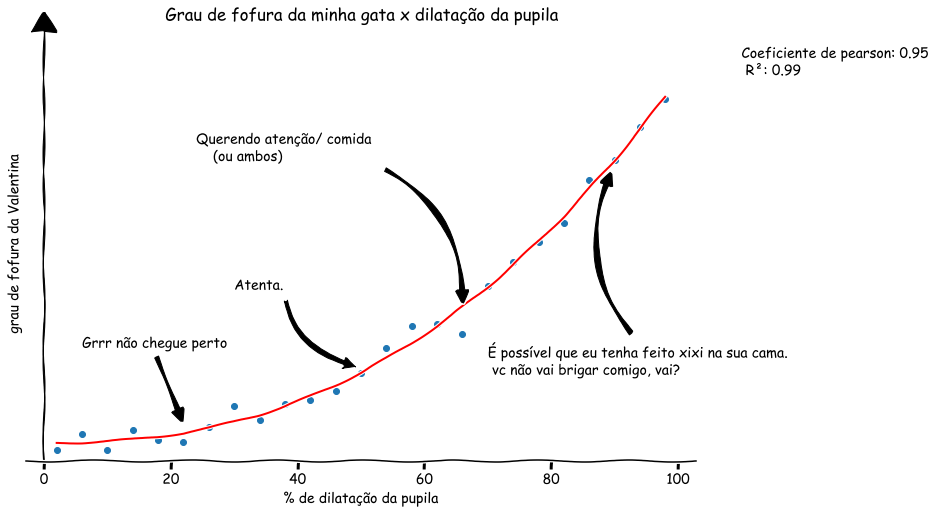

In [17]:
#xkcd is the childish style used
with plt.xkcd():
    plt.rcParams['figure.figsize'] = [12, 8]
    ax = plt.axes()
    
    #Plotting the comments with its respective arrows. xy and xytxet define the place; arrow props let you control the arrows
    #Make this more concise
    plt.annotate(texts[1], xy=(11, 170),xytext=(3, 530), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(texts[2], xy=(25, 436),xytext=(15, 800), arrowprops=dict(facecolor='black', connectionstyle= 'arc3,rad=0.33',
                                                                          shrink=0.05))
    plt.annotate(texts[3], xy=(33, 700),xytext=(12, 1400), arrowprops=dict(facecolor='black',connectionstyle= 'arc3,rad=-0.33',
                                                                          shrink=0.05))
    plt.annotate(texts[4], xy=(45, 1380),xytext=(35, 400), arrowprops=dict(facecolor='black',connectionstyle= 'arc3,rad=-0.33',
                                                                          shrink=0.05))
     
    #Titles for x,y axes and graph itsel
    ax.set_xlabel('% de dilatação da pupila')
    ax.set_ylabel('grau de fofura da Valentina')
    plt.title('Grau de fofura da minha gata x dilatação da pupila')
    
    #size of vertical axis
    plt.ylim(0, y.max()*1.2)
    
    #blue dots, the actual sample generated before
    plt.scatter(x, y)
    
    #red line, the model created from curve_fit
    plt.plot(x, y_fitted, color='red')
    
    #I used custom labels on x axis because I was lazy to redo the sample- you can get get rid of it
    plt.xticks(ticks= [0, 10, 20, 30, 40, 50], labels= [0,20,40,60, 80, 100])
    plt.yticks([]) #empy y axis because thre's reaaly no unit of cuteness
    
    #This can also be done with loop - it's going to be more pythonic
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    #Create the arrow on y axis. First for parameters are the
    ax.arrow(0, 0, 0 ,2000.,clip_on=False, fc='black',ec='black', head_width=2, head_length=3, overhang=30)
    ax.text(55, 1800, 'Coeficiente de pearson: 0.95 \n R²: 0.99')